# <p style="text-align: center;"> Aula Prática 03</p>

## Objetivos desta aula:

    - Transformações Geométricas
    - Interpolação


## Professor: Jefersson dos Santos - jefersson@dcc.ufmg.br
### Monitor: Caio Cesar - caiosilva@ufmg.br

In [1]:
from scipy import misc, ndimage
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage import transform as tf
import math

from __future__ import print_function

import skimage
from skimage import io, color
from skimage.morphology import disk
from skimage.morphology import dilation
from skimage.morphology import erosion
from skimage.morphology import diamond
from skimage.morphology import opening
from skimage.morphology import closing


In [2]:
# Funcao para plotar uma imagem qualquer
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

## Abrindo a imagem

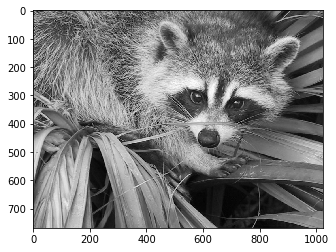

In [3]:
face = misc.face(gray=True)
plt.imshow(face, cmap='gray')
plt.show()

# Morfologia

## Erosão e Dilatação

Original:


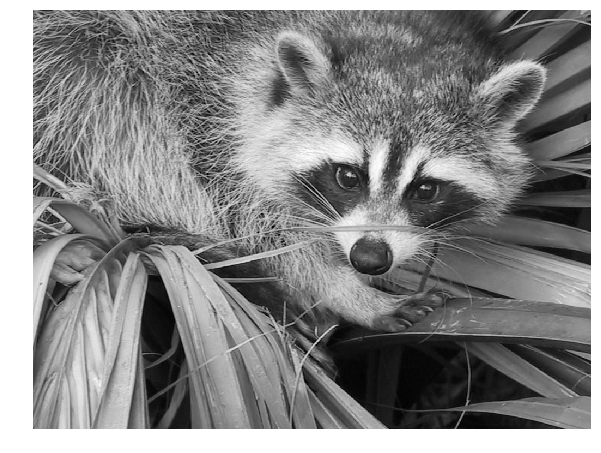

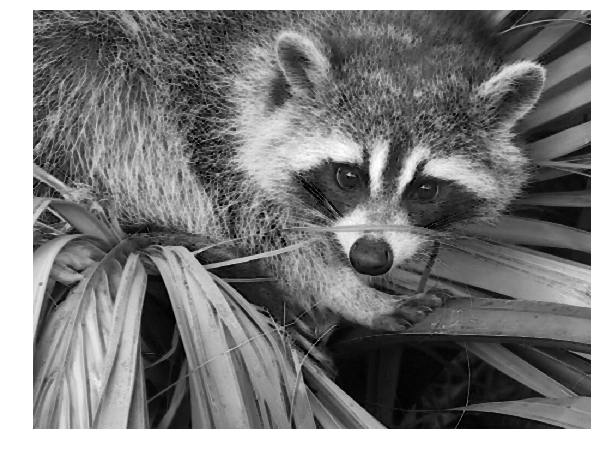

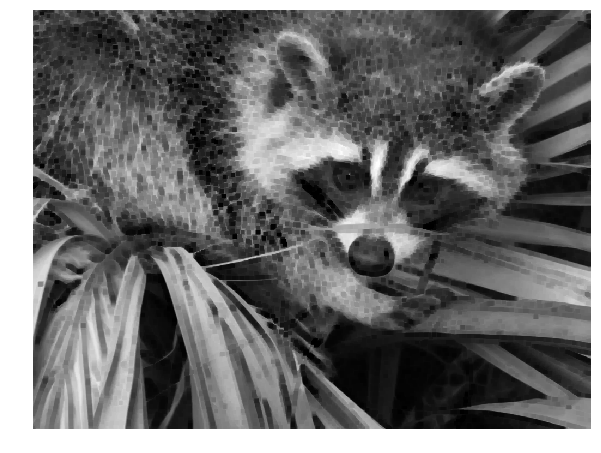

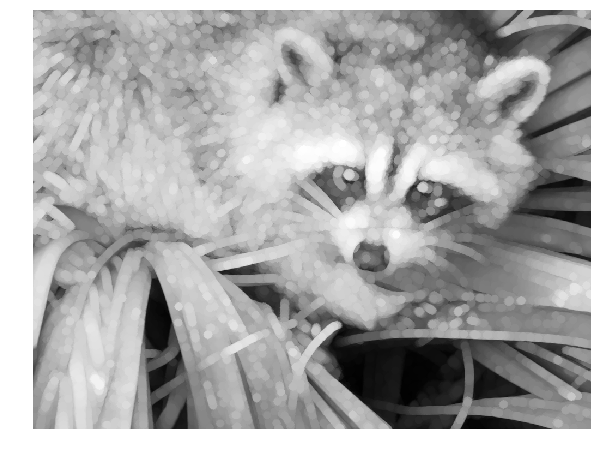

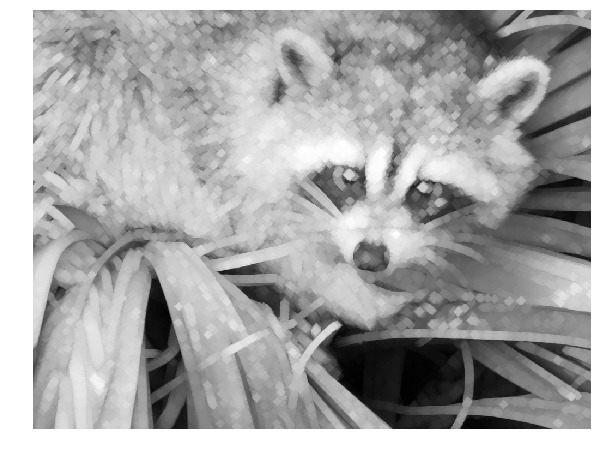

In [4]:
image = face
image_gray = color.rgb2gray(image)       # Convert the image to grayscale (1 channel)

print("Original:")
show(image_gray)

#out = dilation(image_gray, skimage.morphology.square(3))
out = erosion(image_gray, skimage.morphology.square(3))
show(out)

#out = dilation(image_gray, skimage.morphology.square(7))
out = erosion(image_gray, skimage.morphology.square(7))
show(out)

out = dilation(image_gray, skimage.morphology.disk(7))
#out = erosion(image_gray, skimage.morphology.disk(7))
show(out)

#out = erosion(image_gray, skimage.morphology.diamond(7))
out = dilation(image_gray, skimage.morphology.diamond(7))
show(out)

## Abertura e Fechamento

Original:


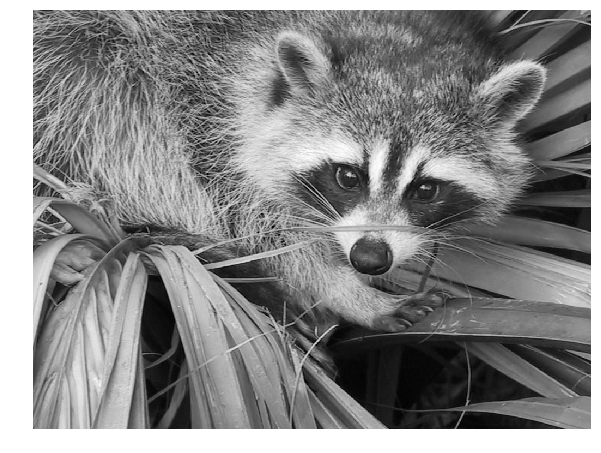

Abertura:


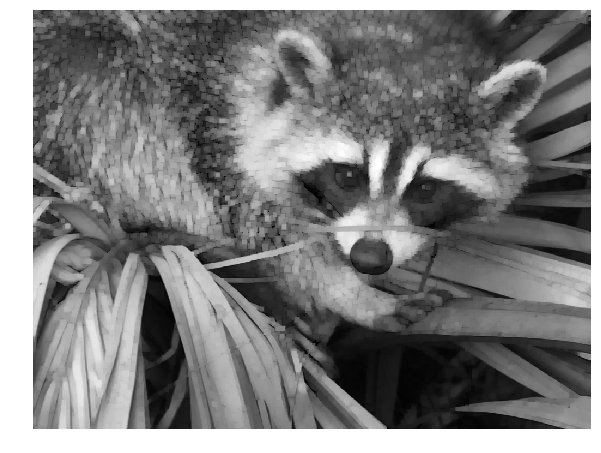

Fechamento:


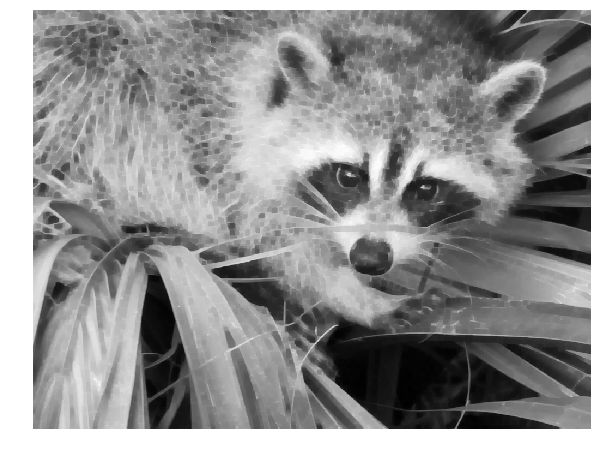

In [5]:
image = face
image_gray = color.rgb2gray(image)       # Convert the image to grayscale (1 channel)

print("Original:")
show(image_gray)

print("Abertura:")
#out = dilation(image_gray, skimage.morphology.square(3))
out = opening(image_gray, skimage.morphology.square(7))
show(out)

print("Fechamento:")
out = closing(image_gray, skimage.morphology.square(7))
show(out)

# Transformações Geométricas

## Cortando as imagens

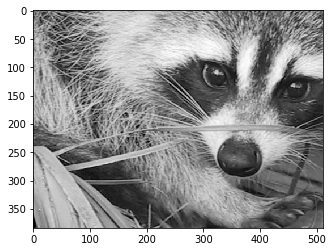

In [6]:
lx, ly = face.shape
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]
plt.imshow(crop_face, cmap='gray')
plt.show()

## Virar Horizontalmente/Verticalmente

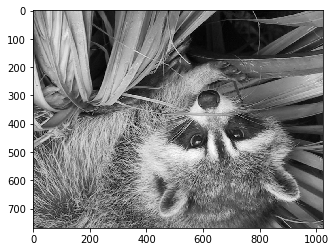

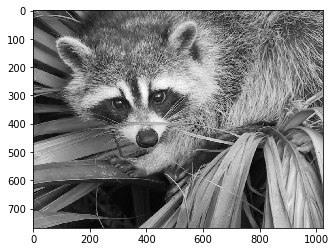

In [7]:
flip_ud_face = np.flipud(face)
plt.imshow(flip_ud_face, cmap='gray')
plt.show()

flip_left_right = np.fliplr(face)
plt.imshow(flip_left_right, cmap='gray')
plt.show()

## Escalonando imagens:

/home/yuri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.
/home/yuri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


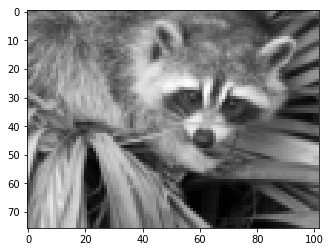

In [8]:
scaled = misc.imresize(face,10)
misc.imsave('face.png', scaled) 
plt.imshow(scaled, cmap='gray')
plt.show()

# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(1,8))

# img = io.imread('simpsonsG.png')
# plt.imshow(img)
# plt.show()

# import skimage.transform as sk

# menor = sk.resize(img, (500,300))
# plt.imshow(menor)
# plt.show()

### Observações:

Criando uma figura, plt.figure( ), você pode determinar o tamanho que você quer que a figura tenha, os parâmetros são em largura e comprimento, definindo o primeiro valor já se tem um fator de reescala.

## Transladando imagens:

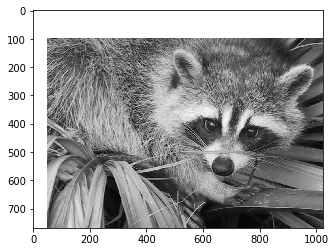

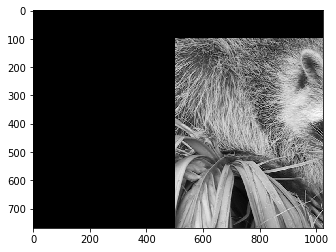

In [9]:
shifted = ndimage.shift(face,[100, 50], cval=255)
plt.imshow(shifted, cmap='gray')
plt.show()

shifted = ndimage.shift(face,[100, 500], cval=0)
plt.imshow(shifted, cmap='gray')
plt.show()

# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# from skimage.transform import AffineTransform, warp

# def shift(image, vector):
#     transform = AffineTransform(translation=vector)
#     shifted = warp(image, transform, mode='constant', preserve_range=True)
#     return shifted

# img = mpimg.imread('simpsonsG.png')  
# imgS = shift(img,[-100, -100])
# plt.imshow(imgS)
# plt.show()

### Observações:

A translação é a mudança da localização do objeto. Se você conhece a mudança na direção (x, y), sendo (tx, ty), você pode criar a matriz de transformação M da seguinte maneira:

                                        M = [1   0   tx]
                                            [0   1   ty]

Você pode transformar em uma matriz Numpy do tipo np.float32 e passar para a função AffineTransfrom (). Acima está representado um exemplo para uma mudança de (-100,-100).

## Rotacionando imagens:

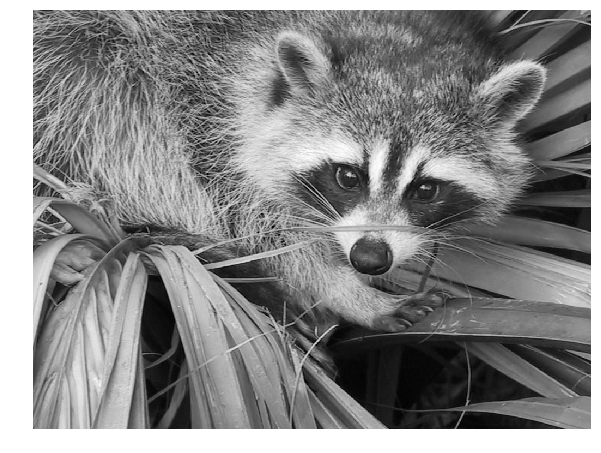

[[   1.96013316   -0.95885108 -100.        ]
 [   0.39733866    1.75516512 -100.        ]
 [   0.            0.            1.        ]]


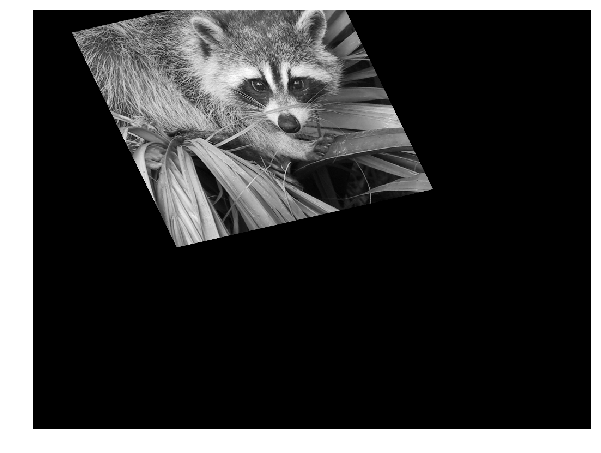

In [10]:
image = face

show(image)

tform = tf.AffineTransform(shear=0.3,scale=(2,2),translation=(-100,-100), rotation=0.2)
#tform = tf.AffineTransform(shear=0.017,scale=(2,2),translation=(-100,-100), rotation=0.00)
#tform = tf.AffineTransform(shear=0.3,scale=(2,2),translation=(-100,-100), rotation=0.05)

print(tform.params)

mat = np.array([[1.96013316,-0.95885108,-100.],[0.39733866,1.75516512,-100.],[0.,0.,1.]])
sheared = tf.warp(image,mat)
# sheared = tf.warp(image,tform)


show(sheared)

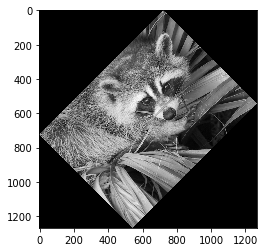

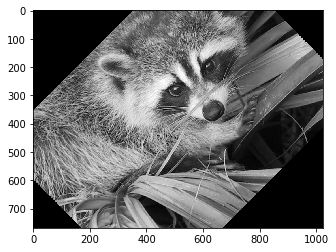

In [11]:
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)
plt.imshow(rotate_face, cmap='gray')
plt.show()
plt.imshow(rotate_face_noreshape, cmap='gray')
plt.show()

# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import skimage.transform  as ski


# img = io.imread('simpsonsG.png') 
# imgR = ski.rotate(img,45)
# io.imshow(imgR)
# io.show()


### Observações:

Existem outras bibliotecas e funções que fazem a rotação da imagem, porem a skimage.transform apresenta uma das formas mais simples. Basta inserir quantos graus você quer que a imagem seja rotacionada como segundo parâmetro da função rotate( ).

## Perspectiva

### Deformação

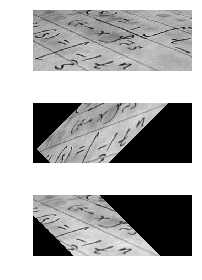

In [12]:
text = data.text()

tform = tf.SimilarityTransform(scale=1, rotation=math.pi/4,
                               translation=(text.shape[0]/2, -100))

rotated = tf.warp(text, tform)
back_rotated = tf.warp(rotated, tform.inverse)

fig, ax = plt.subplots(nrows=3)

ax[0].imshow(text, cmap=plt.cm.gray)
ax[1].imshow(rotated, cmap=plt.cm.gray)
ax[2].imshow(back_rotated, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

### Transformação com perspectiva

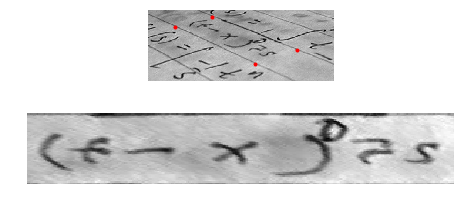

In [13]:
text = data.text()

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(text, tform3, output_shape=(50, 300))

fig, ax = plt.subplots(nrows=2, figsize=(8, 3))

ax[0].imshow(text, cmap=plt.cm.gray)
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

# Exercício

    Crie um novo notebook jupyter cujo nome deve seguir a seguinte syntaxe:
    
        lab3-SUAMATRICULA.ypnb

    Escolha uma imagem em escala de cinza.
    Escreva o código para carregar e mostrar a imagem.
    Escreva o código e mostre a imagem com operações de erosão e dilatação em sequência, assim como fechamento e abertura.
    Escreva o código e mostre uma das imagens rotacionadas em um ângulo = SUAMATRICULA%360 graus, transladada, escalonada e cortada.